In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
%matplotlib inline

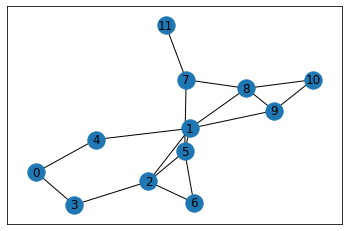

In [2]:
edges = [(10,9),(10,8),(9,1),(9,8),(8,1),(8,7),(7,5),(1,5),(1,2),(1,4),(5,6),(5,2),(2,3),(2,6),(3,0),(0,4),(7,11)]
# edges = [(1,0),(0,2),(1,2)]
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)
plt.show()

In [3]:
from platform import node

num_edges = len(G.nodes)

R = np.matrix(np.zeros(shape = (num_edges,num_edges)))
for index in R:
    index = 100

Q = np.matrix(np.zeros(shape = (num_edges,num_edges)))
Q-=100
for i,edge in enumerate(G.edges):
    Q[edge] = 1
    Q[edge[::-1]] = 1

In [4]:
import pandas as pd
print("R")
pd.DataFrame(R)

R


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
print("Q")
pd.DataFrame(Q)

Q


,0,1,2,3,4,5,6,7,8,9,10,11
0,-100.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,0.0,-100.0,0.0,0.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0
2,-100.0,0.0,-100.0,0.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0
3,0.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,0.0,0.0,-100.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0
6,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0,0.0
8,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0,0.0,-100.0
9,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0,-100.0


In [6]:
def get_next_node(start):
    nearby_nodes = [n for n in G.neighbors(start)]
    next_node_index = random.choice(nearby_nodes)
    return next_node_index

In [7]:
node = 0
while node != 5:
    next_node = get_next_node(node)
    print("{} -> {}".format(node,next_node))
    node = next_node

0 -> 4
4 -> 0
0 -> 3
3 -> 2
2 -> 1
1 -> 8
8 -> 1
1 -> 5


In [13]:
def updateQ(node1,node2,lr,discount):
    max_index = np.where(Q[node2] == np.max(Q[node2]))[1]
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index,size = 1))
    else:
        max_index = int(max_index)
    max_value = Q[node2,max_index]
    new_val = int(
        ( (1-lr)*Q[node1,node2] ) + ( (lr)*(R[node1,node2] + ( discount*max_value) ) )
    )
    print("{} -> {}".format(Q[node1,node2],new_val))
    Q[node1,node2] = new_val
# print(updateQ(0,0,0.1,15))


In [14]:
def learn(epochs, lr, discount):
    for i in range(epochs):
        start = np.random.randint(0,num_edges)
        next_node = get_next_node(start)
        updateQ(start,next_node,lr,discount)

learn(10,0.5,0.8)

0.0 -> 0
0.0 -> 0
0.0 -> 0
0.0 -> 0
0.0 -> 0
0.0 -> 0
0.0 -> 0
0.0 -> 0
0.0 -> 0
0.0 -> 0


In [10]:
import pandas as pd
print("R")
pd.DataFrame(R)

R


,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
print("Q")
pd.DataFrame(Q)

Q


,0,1,2,3,4,5,6,7,8,9,10,11
0,-100.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,0.0,-100.0,0.0,0.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0
2,-100.0,0.0,-100.0,0.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0
3,0.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,0.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,0.0,0.0,-100.0,-100.0,-100.0,0.0,0.0,-100.0,-100.0,-100.0,-100.0
6,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0,0.0
8,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0,0.0,-100.0
9,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,0.0,-100.0
